## Introduction to SCEC Ground Motion Simulation Validation (GMSV) Toolkit

In [1]:
import os
from IPython.display import Image, display

Define the container paths to the GMSV software and to the output directory shared with your laptop.
 * gtk_dir = the path to the installation location of the GMSVtoolkit in the container
 * test_dir = the path to the input files used for testing
 * out_dir = the path to a directory that is shared between the container and the users computer. This is where results will be written so they are available after the container exists.

In [2]:
gtk_dir = "/opt/src/gmsvtoolkit/gmsvtoolkit"
test_dir="/opt/src/gmsvtoolkit/gmsvtoolkit/tests/ref_data"
out_dir = "/home/gtkuser/target"

Start by running the rotdxx.py script. This calculates a ROTD50 values from seismograms. Start by running the --help version to identify the input parameters.

In [3]:
cmd = "%s/metrics/rotdxx.py --help"%(gtk_dir)
print("Running: ", cmd)
os.system(cmd)

Running:  /opt/src/gmsvtoolkit/gmsvtoolkit/metrics/rotdxx.py --help
Running module: rotdxx.py
usage: rotdxx.py [-h] [--input-dir INPUT_DIR] [--output-dir OUTPUT_DIR]
                 [-i INPUT_FILE] [-o OUTPUT_FILE] [--batch-file BATCH_FILE]
                 [--station-list STATION_LIST] [--vertical] [--rotd100]
                 [--rotd50]

Compute RotDXX for one or more seismograms.

options:
  -h, --help            show this help message and exit
  --input-dir INPUT_DIR
                        input directory
  --output-dir OUTPUT_DIR
                        output directory
  -i INPUT_FILE, --input INPUT_FILE, --input-file INPUT_FILE
                        input acceleration BBP file
  -o OUTPUT_FILE, --output OUTPUT_FILE, --output-file OUTPUT_FILE
                        output rd100 file
  --batch-file BATCH_FILE, -b BATCH_FILE
                        file with list of timeseries to process
  --station-list STATION_LIST, -s STATION_LIST
                        station list for ba

0

Construct a version of the command giving input parameters that include:
  -station-list
  -output-dir
  -input-dir

In [4]:
cmd = "%s/metrics/rotdxx.py --station-list %s/metrics/nr_v19_06_2_3_stations.stl --output-dir %s/sample_output --input-dir %s/metrics"%(gtk_dir,test_dir,out_dir,test_dir)
print("Running: ", cmd)
os.system(cmd)

Running:  /opt/src/gmsvtoolkit/gmsvtoolkit/metrics/rotdxx.py --station-list /opt/src/gmsvtoolkit/gmsvtoolkit/tests/ref_data/metrics/nr_v19_06_2_3_stations.stl --output-dir /home/gtkuser/target/sample_output --input-dir /opt/src/gmsvtoolkit/gmsvtoolkit/tests/ref_data/metrics
Running module: rotdxx.py
[ROTDXX]: Processing 10000000.2001-SCE.acc.bbp
[ROTDXX]: Processing 10000000.2002-SYL.acc.bbp
[ROTDXX]: Processing 10000000.2003-JEN.acc.bbp


0

Next run a plotting script that plots the ROTD50 results.

In [5]:
cmd = "%s/plots/plot_rotdxx.py --help"%(gtk_dir)
print("Running: ", cmd)
os.system(cmd)

Running:  /opt/src/gmsvtoolkit/gmsvtoolkit/plots/plot_rotdxx.py --help
Running module: plot_rotdxx.py
usage: plot_rotdxx.py [-h] [--input-dir INPUT_DIR] [--output-dir OUTPUT_DIR]
                      [-o OUTPUT_FILE] [--batch-file BATCH_FILE]
                      [--station-id STATION_ID] [--station-list STATION_LIST]
                      [--labels LABELS] [--comp-label COMP_LABEL] [--rotd100]
                      [--rotd50] [--low-freq LFREQ] [--high-freq HFREQ]
                      [input_files ...]

Plot RotD50/RotD100 comparison of two or more files.

positional arguments:
  input_files

options:
  -h, --help            show this help message and exit
  --input-dir INPUT_DIR
                        input directory
  --output-dir OUTPUT_DIR
                        output directory
  -o OUTPUT_FILE, --output OUTPUT_FILE, --output-file OUTPUT_FILE
                        output rd100 file
  --batch-file BATCH_FILE, -b BATCH_FILE
                        file with list of timeserie

0

Now construct a plot_rotdxx script with input parameters for the plots of interest:

In [6]:
cmd = "%s/plots/plot_rotdxx.py --station-list %s/metrics/nr_v19_06_2_3_stations.stl --output-dir %s/sample_output --labels \"NR\",\"100000\" --comp-label \"NR_100000\" %s/obs %s/sample_output"%(gtk_dir,test_dir,out_dir,test_dir,out_dir)
print("Running: ", cmd)
os.system(cmd)

Running:  /opt/src/gmsvtoolkit/gmsvtoolkit/plots/plot_rotdxx.py --station-list /opt/src/gmsvtoolkit/gmsvtoolkit/tests/ref_data/metrics/nr_v19_06_2_3_stations.stl --output-dir /home/gtkuser/target/sample_output --labels "NR","100000" --comp-label "NR_100000" /opt/src/gmsvtoolkit/gmsvtoolkit/tests/ref_data/obs /home/gtkuser/target/sample_output
Running module: plot_rotdxx.py
[PLOTRDXX]: Generating RotDXX comparison plot for station 2001-SCE
[PLOTRDXX]: Generating RotDXX comparison plot for station 2002-SYL
[PLOTRDXX]: Generating RotDXX comparison plot for station 2003-JEN


0

Now plot the output file:

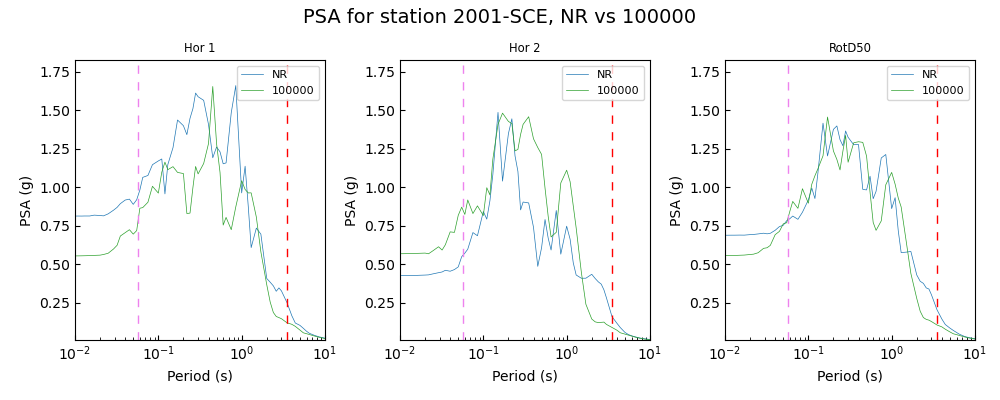

In [7]:

display(Image("./sample_output/NR_100000_2001-SCE_rotd50.png"))

In [8]:
cmd = "%s/metrics/fas.py --help"%(gtk_dir)
os.system(cmd)

usage: fas.py [-h] --station-list STATION_LIST [--output-dir OUTPUT_DIR]
              [--logfile LOGFILE] --labels LABELS
              [input_folders ...]

Compute FAS for a set of seismograms.

positional arguments:
  input_folders

options:
  -h, --help            show this help message and exit
  --station-list STATION_LIST, -s STATION_LIST
                        station list for batch processing
  --output-dir OUTPUT_DIR
                        output directory
  --logfile LOGFILE     file to store processing log messages
  --labels LABELS, -l LABELS
                        comma-separated comparison labels


0